In [3]:
# Imports packages for data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats

# Import packages for visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
%matplotlib inline

Hypothesis testing is a method to test a claim or assertion about a particular parameter of a population. In hypothesis testing we'll evaluate two mutually exclusive opposing hypotheses, to conclude on the population parameter.

The null hypothesis ($H_0$) represents either the skeptical perspective or a claim to be tested. In general, the null hypothesis states that the treatment has no effect, no change or no difference.

The alternative hypothesis ($H_a$) states that there is a change, a difference or a relationship for the general population. Often we will state the alternative hypothesis as a possible parameter values. 

In hypothesis testing, we will reject the null hypothesis when the sample evidence suggest that it is far more likely that the alternative hypothesis is true. Failure to reject the null hypothesis does not prove that the null hypothesis is true. However, when we reject the null hypothesis we have statistical proof that the alternative hypothesis is correct.

#### YRBSS Dataset
The `yrbss_samp` data set contains a random sample of respondents of YRBSS survey in 2013. We will compare data from the 2011 YRBSS to our sample of 100 students from the 2013 survey.

Suppose that the number of days a YRBSS respondents lifted weights an average of 3.09 days in 2011. We want to determine if the `yrbss_samp` data set provides strong evidence that YRBSS students selected in 2013 are lifting more or less than the 2011 YRBSS students. We can summarize this under the hypothesis testing framework as;  
**Null Hypothesis** ($H_0$) : The average days per week that a student lifted weights was same for 2011 and 2013.  
**Alternative Hypothesis** ($H_a$) : The average days per week that a student lifted weights was different for 2013 than 2011.

Mathematically, we can state these hypothesis as follows;  
$$H_0: \mu_{13}=3.09$$
$$H_a: \mu_{13} \neq 3.09$$

The reference value for the parameter in $H_0$ is called the **null value**.  
If the null hypothesis is true, we would expect the sample statistic to be close to the population parameter. If the sample statistic is close to the population parameter we would not have sufficient evidence to reject the null hypothesis. However, if there is a large difference between the sample statistic and the population parameter, we might conclude that the null hypothesis is false.

### Testing Hypothesis using confidence interval
When we take random samples from a population, the point estimate and the true population mean can vary due to the _sampling variation_. Given a point estimate we can use confidence intervals to find a range of possible values for the population mean.

In [11]:
yrbss_sample = pd.read_csv('./Data/yrbss_samp.csv')
weight = yrbss_sample['strength_training_7d'].dropna()

# Sample mean
s_mean = weight.mean()

# Standard Error
standard_error = weight.std()/np.sqrt(len(weight))

# Using the sample mean and the standard error, it is possible to 
# construct the 95% confidence interval;
s_mean - 1.96*standard_error, s_mean + 1.96*standard_error

(2.2750201668193153, 3.2849798331806843)

We can be 95% confident that the average number of days per week that all students from the 2013 YRBSS lifted weights was between 2.27 and 3.28 days.

Because our null value (average in 2011) is 3.09, falls within the the confidence interval, we cannot say the null hypothesis is implasible. Thus, we fail to reject the null hypothesis

### Hypothesis Testing Using p-values


> ##### Gender Discrimination Study
> Suppose that we conducted an experiment to see whether therer is gender discrimination when making promotion decisions. For the experiment 48 male bank supervisors were each given the same personnel file and asked to judge whether the person should be promoted to a branch manager job. 
The files were identical except that half of the supervisors had files showing the person was male while the other half had files showing the person was female. The files are randomly assigned to the supervisors. Of the 48 files reviewed, 35 were promoted. Out of the 35 promoted 21 files was male and 14 files was female.  

The difference 29.2%, ($\frac{21}{24} - \frac{14}{24}$), is a **point estimate** of the true effect.  
If that the promotion decision is independent of gender, we would expect the same percentage of females and males to be promoted. The sampling distribution of the percentage difference would be centered at 0, with random fluctuations due to sampling variations. Under the hypothesis testing framework we can state the null hypothesis and the alternative hypothesis as;  
$H_0 : p_{(male)} - p_{(female)}=0$ (The promotion decision is independent of the gender)  
$H_A : p_{(male)} - p_{(female)} >= 0$ (The promotion decision is not independent of the gender, and females are discriminated against in promotion decisions).

Suppsing that gender does not affect the promotion decision, We can simulate this experiment by taking 48 personnel file, 24 labled male and 24 labled female, and randomly assigning the files to two stakes. We will assign 35  files to the first stake, representing the 35 recommendations for promotion. The second stack will have 13 files representing the non-promotions. 

If we repeated the simulation 1000 times we can get a good idea of the distribution of differences from chance alone.

Instances where difference was grater than or equal to 29.2%:
	 2
Instances where difference was grater than or equal to 29.2%:
	 0.0002


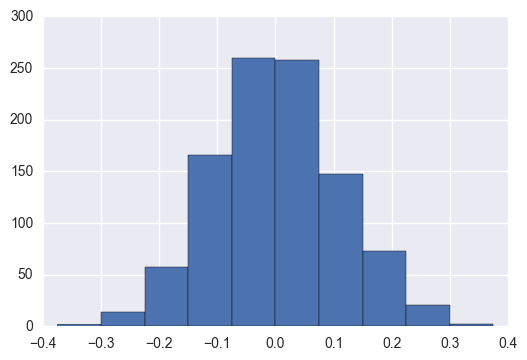

In [154]:
population = np.array(['male', 'female']*24)
diff = np.zeros(1000)

for s in range(0,1000):
    np.random.seed(s*s)
    np.random.shuffle(population)
    promoted = population[:35]
    p_male = np.sum(promoted=='male') /24
    p_female = np.sum(promoted=='female') /24
    
    diff[s]=(p_male - p_female)
    
plt.hist(diff);
print ('Instances where difference was grater than or equal to 29.2%:\n\t',np.sum(diff>= .292))
print ('Instances where difference was grater than or equal to 29.2%:\n\t',np.sum(diff>= .292)/10000)

In [157]:
np.percentile(diff,95)

0.20833333333333337

According to the stimulation a difference of at least 29.2% due to chance alone would happen about 0.2% of the time.
Given this probability we can interpret the hypothesis as;  
$H_0$: Given that gender has no effect on promotion decision, the observed difference would only happen rarely.  
$H_A$: Gender has an effect on promotion decision, which is why such a large difference was observed.

The 2 in 1,000 chance of getting a difference of 29.2% or greater, while the null hypothesis is true is called the **p-value**. This 0.002 probability quantifies the strenght of evidence against the null hypothesis.

Typically, we use a summary statistic, difference in proportions in this case, to help compute the p-value and evaluate the hypothesis. The summary statistic used  to compute the p-value is often called the **test statistic**.

When performing hypothesis testing we use limited or incomplete information based on the sample to reach a general conclusion about the whole population. Although the sample data are usually representative of the population, there is always a chance that the sample is misleading and will cause us to make the wrong conclusion. In hypothesis testing there are two different kind of errors that can be made.

**Type I Errors** will occure when $H_0$ is actually true, but it so happens that we reject the null hypothesis. For example, suppose $H_0$ is true and that there is no gender discrimenation, but we drew a sample with a mean that is much more than 0 and we wrongfully reject the null hypothesis. The probability of making a Type I error is called the **significance level** and is symbolized by the value $\alpha$.

**Type II Error** occurs when a false null hypothesis is not rejected. The probability of committing a Type II error, is given by $\beta$.

The complement of $\alpha$ ,$(1-\alpha)$, is called the confidence coefficient. The confident coefficient is the probability that we will not reject the null hypothesis,$H_0$, when it is true and should not be rejected.

The complement of the probability of a Type II error,$(1-\beta)$, is called the _power of a statistical test_. The power of a statistical test is the probability that null hypothesis will be rejected when it is false and it should be rejected.

The sampling distribution of the test statistic is divided in to two regions, a rejection region and a region of non-rejection. If the test statistic falls into the region of nonrejection, we would not reject the null hypothesis, If the test statistic falls into the rejection region, we will reject the null hypothesis.

The region of rejection consist of the values of the test statistic that are unlikely to occure if the null hypothesis is true. The size of the rejection region depends of the value assigned to $\alpha$. Generally, we would use alpha levels of 0.05, 0.01 and 0.001. By rejecting $H_0$, we are saying that the difference between the null value and the test statistic is small, and may have occured because of sampling error alone.

When we are interested in checking for an increase or decease, but not both, we will use an **one-sided test**. The one-tailed test is called a **left-tailed test** if the rejection region is in the left tail of the discribution curve, and is called a **right-tailed test** if the rejection region is in the right tail of the distribution curve. The area of the rejection region is $\alpha$.
We will use an left-tailed test if the hypothesis checks for an decrease in the population parameter, and a right-tailed test if the hypothesis checks for an increase in the population parameter.

If the alternative hypothesis checks for an difference in either direction, we will use an **two-tailed test**, which has two rejection regions, one in each tail of the distribution. The area in each rejection region is $\alpha/2$. We will reject the $H_0$ if the test statistic falls in either of the two rejection regions.

Given a significance level of 0.05,a left-tailed test will have a rejection region that include the $0^{th}$ to $5^{th}$ percentile of values,while a right-tailed test will include values from $95^{th}$ to $100^{th}$ percentile.

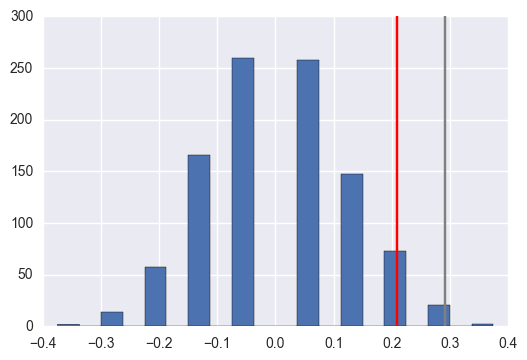

In [167]:
plt.hist(diff,bins=20);
plt.vlines(x = np.percentile(diff,95),ymin = 0, ymax = 300, color ='red')
plt.vlines(x = 0.292,ymin = 0, ymax = 300,color='grey')

Under the $p-value$ approach, we reject the null hypothesis if $$\text{p-value} \leq \alpha \text{ or } \text{p-value} \geq \alpha$$ and we do not reject the null hypothesis if $$\text{p-value} < \alpha \text{ or } \text{p-value} > \alpha$$

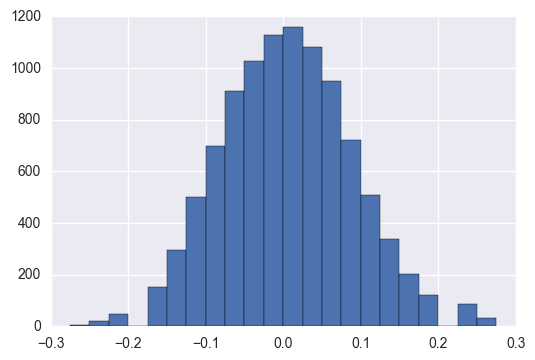

In [133]:
population = np.array(['control', 'treatment']*75)
diff = np.zeros(10000)

for s in range(0,10000):
    np.random.seed(2)
    np.random.shuffle(population)
    buy_dvd , not_buy = np.split(population,2)
    p_ctrl = np.sum(buy_dvd=='control') /75
    p_trmt = np.sum(buy_dvd=='treatment') /75
    
    diff[s]=(p_trmt - p_ctrl)
    
plt.hist(diff,bins=np.arange(-.3,.3,0.025));

In [168]:
3

3